In [1]:
from scipy import misc
import tensorflow as tf
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
def read_and_decode(filename):
    #根据文件名生成一个队列
    filename_queue = tf.train.string_input_producer([filename])

    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)   #返回文件名和文件
    features = tf.parse_single_example(serialized_example,
                                       features={
                                           'label': tf.FixedLenFeature([], tf.int64),
                                           'img_raw' : tf.FixedLenFeature([], tf.string),
                                       })

    img = tf.decode_raw(features['img_raw'], tf.uint8)
    img = tf.cast(img,tf.float64)

    img = tf.reshape(img, [48, 24, 3])
    img=tf.split(img,3,2)[0]
    label = tf.cast(features['label'], tf.int32)
    return img, label


def name(i):
    classes = {"0":0,"1":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"A":10,"B":11,"C":12,"D":13,"E":14,"F":15,"G":16,"H":17,"J":18,"K":19,"L":20,"M":21,"N":22,"P":23,"Q":24,"R":25,"S":26,"T":27,"U":28,"V":29,"W":30,"S":31,"Y":32,"Z":33}
    for (key, value) in classes.items():
        if value == i:
            return key

Tensor("shuffle_batch_1:0", shape=(50, 48, 24, 1), dtype=float64) Tensor("shuffle_batch_1:1", shape=(50,), dtype=int32)
5


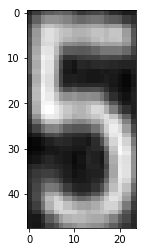

E


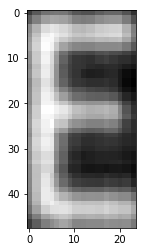

4


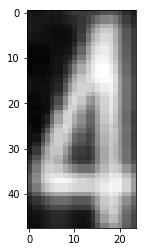

A


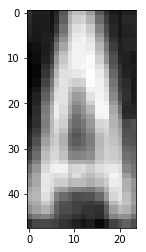

A


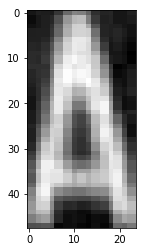

0


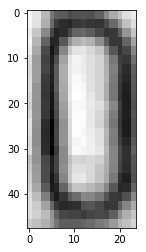

U


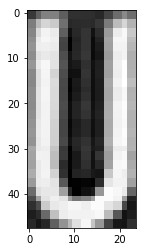

S


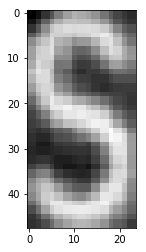

9


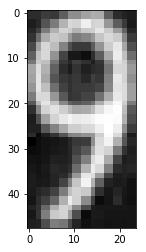

S


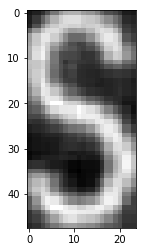

G


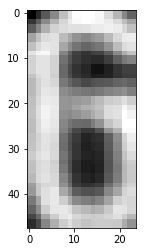

6


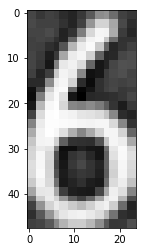

J


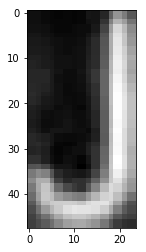

9


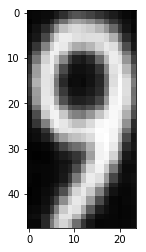

6


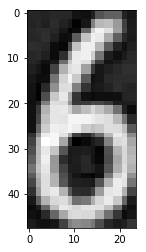

N


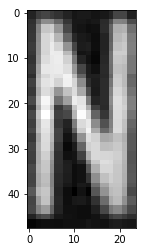

Y


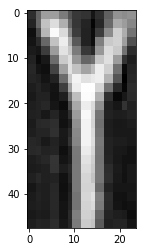

7


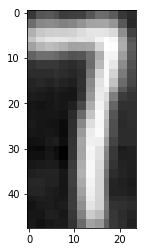

P


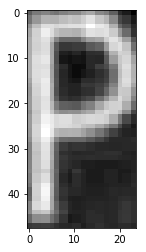

2


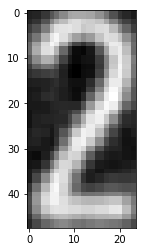

E


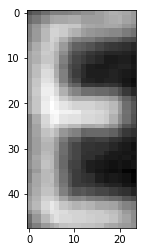

J


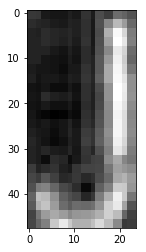

5


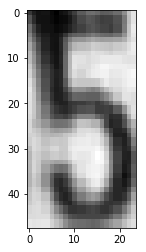

E


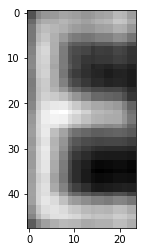

E


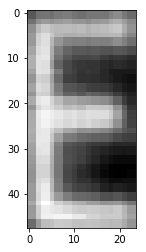

H


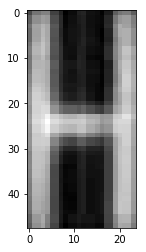

T


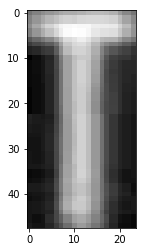

2


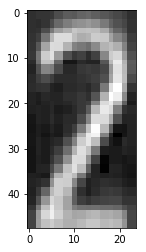

3


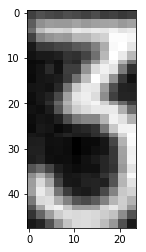

J


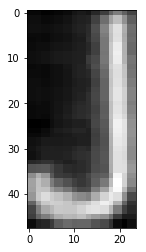

C


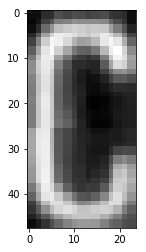

A


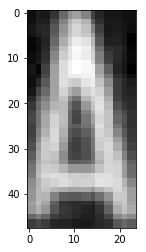

8


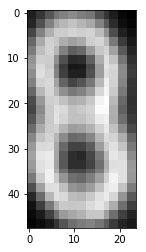

8


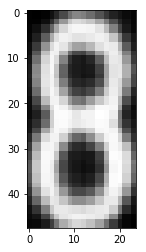

W


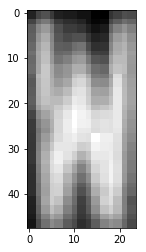

E


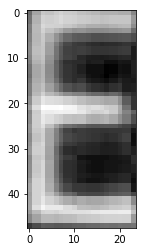

1


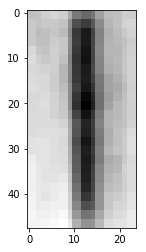

2


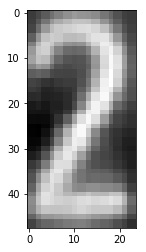

3


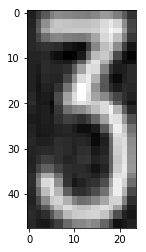

1


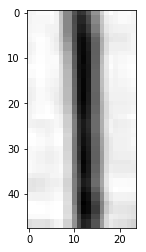

F


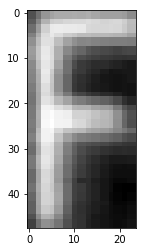

S


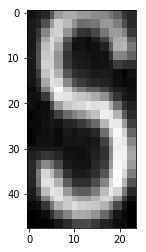

7


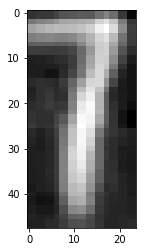

9


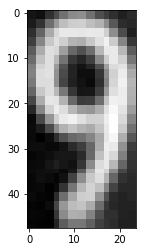

8


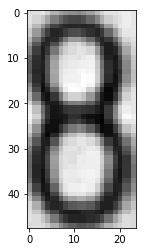

6


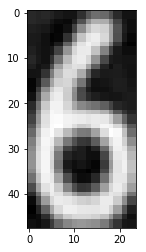

4


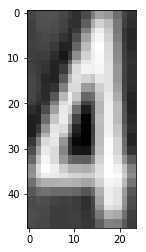

A


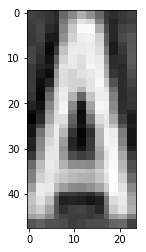

T


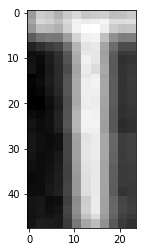

3


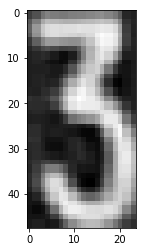

INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.CancelledError'>, Enqueue operation was cancelled
	 [[Node: input_producer_1/input_producer_1_EnqueueMany = QueueEnqueueManyV2[Tcomponents=[DT_STRING], timeout_ms=-1, _device="/job:localhost/replica:0/task:0/cpu:0"](input_producer_1, input_producer_1/RandomShuffle)]]

Caused by op 'input_producer_1/input_producer_1_EnqueueMany', defined at:
  File "/home/haiyang/.linuxbrew/Cellar/python3/3.6.0/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/haiyang/.linuxbrew/Cellar/python3/3.6.0/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/haiyang/venv/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/haiyang/venv/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/haiyang/venv/lib/p

IndexError: index 50 is out of bounds for axis 0 with size 50

In [4]:
img, label = read_and_decode("validation.tfrecords")

#使用shuffle_batch可以随机打乱输入
img_batch, label_batch = tf.train.shuffle_batch([img, label],
                                                batch_size=50, capacity=25000,
                                                min_after_dequeue=10000)

print(img_batch,label_batch)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    coord = tf.train.Coordinator()  
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    for i in range(500):
        val, l= sess.run([img_batch, label_batch]) 
        plt.imshow(val[i].reshape(48,24),cmap="gray")
        print(name(l[i]))
        plt.show()
#         print(l.shape)
#         print(l)
    coord.request_stop()  
    coord.join(threads)  
    sess.close()   
